In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("df_before_analysis.csv")
df

,Unnamed: 0,Année,age-depart-retraite,Code du département,Dépenses,Recettes,Déficit au sens de Maastricht,Inscrits,Abstentions,Votants,...,taux_pauvrete_seuil_50%,taux_pauvrete_seuil_60%,taux_pauvrete_seuil_70%,taux_chomage_ensemble,taux_chomage_15_24,taux_chomage_25_49,taux_chomage_50_+,taux_chomage_femme,taux_chomage_homme,Taux de natalité
0,0,1975.0,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,...,10.60000,17.000000,23.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1975.0,NaN,79,NaN,NaN,NaN,NaN,NaN,NaN,...,10.60000,17.000000,23.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1975.0,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,...,10.60000,17.000000,23.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1975.0,NaN,87,NaN,NaN,NaN,NaN,NaN,NaN,...,10.60000,17.000000,23.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1975.0,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,...,10.60000,17.000000,23.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,2024.0,63.766656,47,57.3,51.9,-5.5,NaN,NaN,NaN,...,8.66093,14.765934,22.809003,7.4,18.4,6.9,4.9,7.4,7.4,9.5
668,668,2024.0,63.766656,64,57.3,51.9,-5.5,NaN,NaN,NaN,...,8.66093,14.765934,22.809003,5.7,14.1,5.3,4.1,5.7,5.8,9.5
669,669,2024.0,63.766656,79,57.3,51.9,-5.5,NaN,NaN,NaN,...,8.66093,14.765934,22.809003,5.3,14.1,4.7,3.4,5,5.5,9.5
670,670,2024.0,63.766656,23,57.3,51.9,-5.5,NaN,NaN,NaN,...,8.66093,14.765934,22.809003,7.0,19,6.7,4.6,6.5,7.5,9.5


In [3]:
df.columns


Index(['Unnamed: 0', 'Année', 'age-depart-retraite', 'Code du département',
       'Dépenses', 'Recettes', 'Déficit au sens de Maastricht', 'Inscrits',
       'Abstentions', 'Votants', 'Extreme Gauche', 'Gauche', 'Droite',
       'Extreme Droite', 'Autre', 'Election', 'esperance_vie_homme',
       'esperance_vie_femme', 'indicateur-fecondite', 'age-moyen-mere',
       'raport-inegalite-homme-femme', 'raport-inegalite-cadre-ouvrier',
       'Rapport interdécile (D9/D1)', 'rapport-inegalite-d9-d5',
       'rapport-inegalite-d5-d1', 'Taux inflation', 'nbr_emplois',
       'rapport-retraite', 'Population 0 à 19 ans', 'Population 20 à 39 ans',
       'Population 40 à 59 ans', 'Population 60 à 74 ans',
       'Population 75 ans et plus', 'Population Total',
       'taux-activite-15-24-femme', 'taux-activite-25-49-femme',
       'taux-activite-50-64-femme', 'taux-activite-65-69-femme',
       'taux-activite-15-24-homme', 'taux-activite-25-49-homme',
       'taux-activite-50-64-homme', 'taux-a

In [4]:
df = pd.get_dummies(df, columns = ['Code du département'])
df.columns

Index(['Unnamed: 0', 'Année', 'age-depart-retraite', 'Dépenses', 'Recettes',
       'Déficit au sens de Maastricht', 'Inscrits', 'Abstentions', 'Votants',
       'Extreme Gauche', 'Gauche', 'Droite', 'Extreme Droite', 'Autre',
       'Election', 'esperance_vie_homme', 'esperance_vie_femme',
       'indicateur-fecondite', 'age-moyen-mere',
       'raport-inegalite-homme-femme', 'raport-inegalite-cadre-ouvrier',
       'Rapport interdécile (D9/D1)', 'rapport-inegalite-d9-d5',
       'rapport-inegalite-d5-d1', 'Taux inflation', 'nbr_emplois',
       'rapport-retraite', 'Population 0 à 19 ans', 'Population 20 à 39 ans',
       'Population 40 à 59 ans', 'Population 60 à 74 ans',
       'Population 75 ans et plus', 'Population Total',
       'taux-activite-15-24-femme', 'taux-activite-25-49-femme',
       'taux-activite-50-64-femme', 'taux-activite-65-69-femme',
       'taux-activite-15-24-homme', 'taux-activite-25-49-homme',
       'taux-activite-50-64-homme', 'taux-activite-65-69-homme',
 

In [5]:
df.drop(["Unnamed: 0","Votants","Abstentions","Inscrits"],axis=1,inplace=True)
df

,Année,age-depart-retraite,Dépenses,Recettes,Déficit au sens de Maastricht,Extreme Gauche,Gauche,Droite,Extreme Droite,Autre,...,Code du département_19,Code du département_23,Code du département_24,Code du département_33,Code du département_40,Code du département_47,Code du département_64,Code du département_79,Code du département_86,Code du département_87
0,1975.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1975.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
2,1975.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
3,1975.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
4,1975.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,2024.0,63.766656,57.3,51.9,-5.5,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
668,2024.0,63.766656,57.3,51.9,-5.5,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
669,2024.0,63.766656,57.3,51.9,-5.5,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
670,2024.0,63.766656,57.3,51.9,-5.5,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0


In [6]:
df_2024 = df[df["Année"]==2024]
df_2024

,Année,age-depart-retraite,Dépenses,Recettes,Déficit au sens de Maastricht,Extreme Gauche,Gauche,Droite,Extreme Droite,Autre,...,Code du département_19,Code du département_23,Code du département_24,Code du département_33,Code du département_40,Code du département_47,Code du département_64,Code du département_79,Code du département_86,Code du département_87
660,2024.0,63.766656,57.3,51.9,-5.5,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
661,2024.0,63.766656,57.3,51.9,-5.5,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
662,2024.0,63.766656,57.3,51.9,-5.5,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
663,2024.0,63.766656,57.3,51.9,-5.5,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
664,2024.0,63.766656,57.3,51.9,-5.5,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
665,2024.0,63.766656,57.3,51.9,-5.5,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
666,2024.0,63.766656,57.3,51.9,-5.5,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0
667,2024.0,63.766656,57.3,51.9,-5.5,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
668,2024.0,63.766656,57.3,51.9,-5.5,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
669,2024.0,63.766656,57.3,51.9,-5.5,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0


In [7]:
df_2024["IsEuropeenne"] = 1
df_2024["IsPresidentielle"] = 0
df_2024["IsLegislative"] = 0
df_2024=df_2024.drop(["Extreme Gauche","Gauche","Droite","Extreme Droite","Autre","Election"], axis=1)
df_2024.columns

/var/folders/6l/7z68vf196xjd9mbcdm1sw6pm0000gn/T/ipykernel_60308/2516773089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024["IsEuropeenne"] = 1
/var/folders/6l/7z68vf196xjd9mbcdm1sw6pm0000gn/T/ipykernel_60308/2516773089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024["IsPresidentielle"] = 0
/var/folders/6l/7z68vf196xjd9mbcdm1sw6pm0000gn/T/ipykernel_60308/2516773089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

Index(['Année', 'age-depart-retraite', 'Dépenses', 'Recettes',
       'Déficit au sens de Maastricht', 'esperance_vie_homme',
       'esperance_vie_femme', 'indicateur-fecondite', 'age-moyen-mere',
       'raport-inegalite-homme-femme', 'raport-inegalite-cadre-ouvrier',
       'Rapport interdécile (D9/D1)', 'rapport-inegalite-d9-d5',
       'rapport-inegalite-d5-d1', 'Taux inflation', 'nbr_emplois',
       'rapport-retraite', 'Population 0 à 19 ans', 'Population 20 à 39 ans',
       'Population 40 à 59 ans', 'Population 60 à 74 ans',
       'Population 75 ans et plus', 'Population Total',
       'taux-activite-15-24-femme', 'taux-activite-25-49-femme',
       'taux-activite-50-64-femme', 'taux-activite-65-69-femme',
       'taux-activite-15-24-homme', 'taux-activite-25-49-homme',
       'taux-activite-50-64-homme', 'taux-activite-65-69-homme',
       'taux-mortalite', 'taux_pauvrete_seuil_40%', 'taux_pauvrete_seuil_50%',
       'taux_pauvrete_seuil_60%', 'taux_pauvrete_seuil_70%',
    

In [8]:
df=df[df['Election'].notnull()]

In [9]:
df['Année'].unique()

array([1994., 1995., 1997., 1999., 2002., 2004., 2007., 2009., 2012.,
       2014., 2017., 2019., 2022.])

In [10]:
df['Election'].unique()

array(['Europeenne', 'Présidentielle', 'Legislative'], dtype=object)

In [11]:
df["IsEuropeenne"] = np.where(df["Election"]=='Europeenne',1,0)
df["IsPresidentielle"] = np.where(df["Election"]=='Présidentielle',1,0)
df["IsLegislative"] = np.where(df["Election"]=='Legislative',1,0)
df.drop("Election",axis='columns',inplace=True)

/var/folders/6l/7z68vf196xjd9mbcdm1sw6pm0000gn/T/ipykernel_60308/2773955747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["IsEuropeenne"] = np.where(df["Election"]=='Europeenne',1,0)
/var/folders/6l/7z68vf196xjd9mbcdm1sw6pm0000gn/T/ipykernel_60308/2773955747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["IsPresidentielle"] = np.where(df["Election"]=='Présidentielle',1,0)
/var/folders/6l/7z68vf196xjd9mbcdm1sw6pm0000gn/T/ipykernel_60308/2773955747.py:3: SettingWithCopyWarning: 
A value is tr

In [12]:
df["Extreme Droite"]=df["Extreme Droite"] + df["Autre"]

/var/folders/6l/7z68vf196xjd9mbcdm1sw6pm0000gn/T/ipykernel_60308/2369863132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Extreme Droite"]=df["Extreme Droite"] + df["Autre"]


In [13]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [14]:
missing_values_table(df_2024)

Your selected dataframe has 58 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [15]:
missing_values_table(df)

Your selected dataframe has 63 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [16]:
#array([1994, 1995, 1997, 1999, 2002, 2004, 2007, 2009, 2012, 2014, 2017, 2019, 2022])

In [17]:
df.to_csv("before_analysis.csv")

/var/folders/6l/7z68vf196xjd9mbcdm1sw6pm0000gn/T/ipykernel_60308/1053040661.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = "inferno")


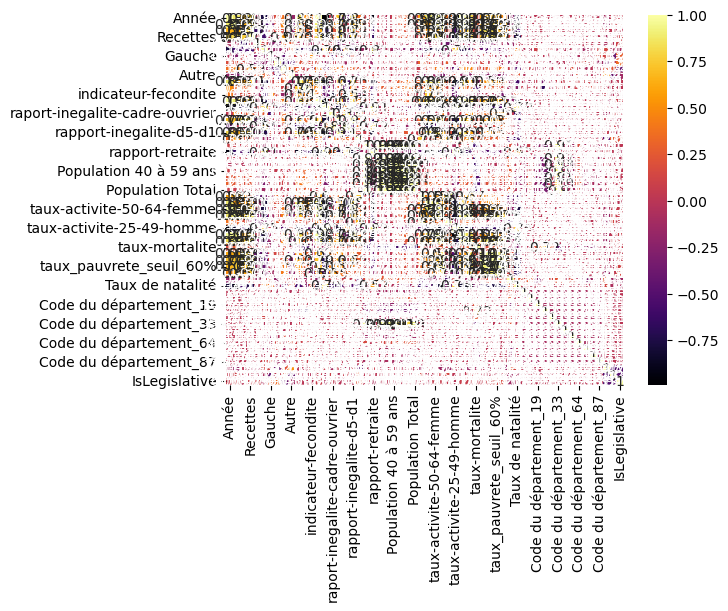

In [18]:
plt.figure()
sns.heatmap(df.corr(), annot = True, cmap = "inferno")
plt.show()

In [19]:
df2 = df[["Extreme Gauche","Gauche","Droite","Extreme Droite"]].copy()
df = df.drop(["Extreme Gauche","Gauche","Droite","Extreme Droite","Autre"], axis=1)

In [20]:
df[["Extreme Gauche","Gauche","Droite","Extreme Droite"]] = df2

df.columns

Index(['Année', 'age-depart-retraite', 'Dépenses', 'Recettes',
       'Déficit au sens de Maastricht', 'esperance_vie_homme',
       'esperance_vie_femme', 'indicateur-fecondite', 'age-moyen-mere',
       'raport-inegalite-homme-femme', 'raport-inegalite-cadre-ouvrier',
       'Rapport interdécile (D9/D1)', 'rapport-inegalite-d9-d5',
       'rapport-inegalite-d5-d1', 'Taux inflation', 'nbr_emplois',
       'rapport-retraite', 'Population 0 à 19 ans', 'Population 20 à 39 ans',
       'Population 40 à 59 ans', 'Population 60 à 74 ans',
       'Population 75 ans et plus', 'Population Total',
       'taux-activite-15-24-femme', 'taux-activite-25-49-femme',
       'taux-activite-50-64-femme', 'taux-activite-65-69-femme',
       'taux-activite-15-24-homme', 'taux-activite-25-49-homme',
       'taux-activite-50-64-homme', 'taux-activite-65-69-homme',
       'taux-mortalite', 'taux_pauvrete_seuil_40%', 'taux_pauvrete_seuil_50%',
       'taux_pauvrete_seuil_60%', 'taux_pauvrete_seuil_70%',
    

In [22]:
nump=df.to_numpy()

In [23]:
X = nump[:,:-4]
y = nump[:,-4:]
X

array([[1994.0, 60.4, 55.5516295013226, ..., 1, 0, 0],
       [1994.0, 60.4, 55.5516295013226, ..., 1, 0, 0],
       [1994.0, 60.4, 55.5516295013226, ..., 1, 0, 0],
       ...,
       [2022.0, 63.0, 58.8, ..., 0, 1, 0],
       [2022.0, 63.0, 58.8, ..., 0, 1, 0],
       [2022.0, 63.0, 58.8, ..., 0, 0, 1]], dtype=object)

In [24]:
scaler = RobustScaler()
X_sc = scaler.fit_transform(X)
print(len(X_sc))
X_sc

228


array([[-1.        , -0.13939394, -0.06760223, ...,  1.        ,
         0.        ,  0.        ],
       [-1.        , -0.13939394, -0.06760223, ...,  1.        ,
         0.        ,  0.        ],
       [-1.        , -0.13939394, -0.06760223, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.86666667,  1.43636364,  0.67550964, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.86666667,  1.43636364,  0.67550964, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.86666667,  1.43636364,  0.67550964, ...,  0.        ,
         0.        ,  1.        ]])

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.2, random_state = 0)
x_train

array([[-0.8       , -0.07878788, -0.09435679, ...,  0.        ,
         0.        ,  1.        ],
       [-0.46666667,  0.        , -0.51361835, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.33333333,  0.47878788,  0.60407809, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        , -0.0969697 ,  0.48638165, ...,  1.        ,
         0.        ,  0.        ],
       [-0.66666667, -0.38181818, -0.55238304, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.53333333,  0.9030303 ,  0.38339813, ...,  0.        ,
         0.        ,  1.        ]])

In [26]:
nump_2024=df_2024.to_numpy()

In [27]:
X_2024 = nump_2024[:,:]

In [28]:
scaler = RobustScaler()
X_sc_2024 = scaler.fit_transform(X_2024)

In [29]:
#%% Optimisation de la méthode Lasso
lasso_pipeline = make_pipeline(Lasso())
lasso_params = {
    "lasso__max_iter": [50000],
    "lasso__alpha": [1e-4, 1e-3, 1e-2, 1e-1],
    }

lasso_grid = GridSearchCV(lasso_pipeline,
                          param_grid = lasso_params,
                          cv = 5,
                          n_jobs = -1)

lasso_grid.fit(x_train, y_train)

best_comb_lasso = {
    "R2": lasso_grid.best_score_,
    "Params": lasso_grid.best_params_
    }

lasso_opt = lasso_grid.best_estimator_
y_pred_lasso = lasso_opt.predict(x_test)


/Users/alisaleh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.321e-01, tolerance: 1.835e-01
  model = cd_fast.enet_coordinate_descent(
/Users/alisaleh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.978e-01, tolerance: 1.661e-01
  model = cd_fast.enet_coordinate_descent(
/Users/alisaleh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

/Users/alisaleh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.070e+01, tolerance: 1.383e+00
  model = cd_fast.enet_coordinate_descent(
/Users/alisaleh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.316e+01, tolerance: 1.241e+00
  model = cd_fast.enet_coordinate_descent(
/Users/alisaleh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

In [30]:
pred_2024_las = lasso_opt.predict(X_sc_2024)
pred_2024_las

array([[ 9.32625496, 32.27644325, 29.50706687, 31.07540012],
       [10.02904239, 26.93001952, 34.13317319, 31.16216602],
       [ 7.23385143, 29.3306531 , 33.44974334, 34.04095246],
       [ 6.16722943, 30.76885889, 31.92491183, 36.36912069],
       [ 9.57534738, 27.51324349, 34.56006365, 30.65670761],
       [ 6.0167808 , 33.30701603, 33.05206432, 31.45174244],
       [ 8.19650021, 29.47105778, 30.71603596, 35.79749966],
       [ 4.56384413, 26.18079175, 30.98350449, 40.75559555],
       [ 7.85326697, 31.0471267 , 32.75861161, 31.06493563],
       [11.9043235 , 24.21911012, 38.63050084, 27.85788352],
       [ 2.45939675, 36.11695451, 30.54454004, 33.38893493],
       [ 0.41772272, 48.67886782, 20.8316489 , 35.57941929]])

In [31]:
#%% Optimisation de la méthode ElasticNet

elastic_pipeline = make_pipeline(
                               ElasticNet())
elastic_params = {
    "elasticnet__max_iter": [50000],
    "elasticnet__alpha": [1e-4, 1e-3, 1e-2, 1e-1],
    "elasticnet__l1_ratio": [0.01, 0.1, 0.5, 1],
    }

elastic_grid = GridSearchCV(elastic_pipeline,
                          param_grid = elastic_params,
                          cv = 5,
                          n_jobs = -1)

elastic_grid.fit(x_train, y_train)

best_comb_elastic = {
    "R2": elastic_grid.best_score_,
    "Params": elastic_grid.best_params_
    }

elastic_opt = elastic_grid.best_estimator_
y_pred_elastic = elastic_opt.predict(x_test)

/Users/alisaleh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.797e+01, tolerance: 1.704e-01
  model = cd_fast.enet_coordinate_descent(
/Users/alisaleh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.947e+01, tolerance: 1.892e-01
  model = cd_fast.enet_coordinate_descent(
/Users/alisaleh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

/Users/alisaleh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.066e+02, tolerance: 1.135e+00
  model = cd_fast.enet_coordinate_descent(
/Users/alisaleh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.016e+01, tolerance: 1.100e+00
  model = cd_fast.enet_coordinate_descent(
/Users/alisaleh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

/Users/alisaleh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.408e+01, tolerance: 1.892e-01
  model = cd_fast.enet_coordinate_descent(
/Users/alisaleh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.799e+01, tolerance: 1.720e-01
  model = cd_fast.enet_coordinate_descent(
/Users/alisaleh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

/Users/alisaleh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.316e+01, tolerance: 1.241e+00
  model = cd_fast.enet_coordinate_descent(
/Users/alisaleh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.070e+01, tolerance: 1.383e+00
  model = cd_fast.enet_coordinate_descent(
/Users/alisaleh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

In [32]:
pred_2024_el = elastic_opt.predict(X_sc_2024)
pred_2024_el

array([[ 9.13418098, 30.71869779, 27.26112038, 35.28096485],
       [ 9.47932552, 25.79891314, 31.60500797, 35.49364175],
       [ 7.31070304, 27.48140814, 30.81657408, 38.22380488],
       [ 6.89006015, 28.9564745 , 28.99868449, 40.20002966],
       [ 9.62611294, 25.74593979, 32.14907933, 35.24179549],
       [ 6.53899236, 31.59346566, 30.2300499 , 35.66256321],
       [ 8.55854609, 27.43508559, 28.38768496, 39.76283415],
       [ 5.02748371, 24.31890706, 28.62148961, 44.783188  ],
       [ 7.57596002, 28.68857189, 31.19313073, 35.05793473],
       [10.76779333, 22.87617495, 36.60878066, 32.38729194],
       [ 2.99405255, 33.21667291, 29.56188111, 36.14219237],
       [ 1.75870361, 47.89715264, 16.97817658, 38.04143821]])

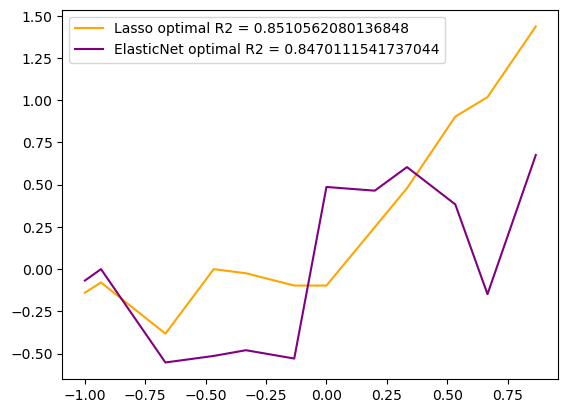

In [33]:
#%% Visualisation des résultats

predictions = np.hstack(( x_test, y_pred_lasso, y_pred_elastic ))

predictions = predictions[np.argsort(predictions[:,0])]

plt.figure()
#plt.scatter(, y, label = "Données")
plt.plot(predictions[:,0], predictions[:,1], c = "orange",
          label = f"Lasso optimal R2 = {lasso_opt.score(x_test,y_test)}")
plt.plot(predictions[:,0], predictions[:,2], c = "purple",
          label = f"ElasticNet optimal R2 = {elastic_opt.score(x_test,y_test)}")
#plt.plot(predictions[:,0], predictions[:,3], c = "purple",label = f"SVR optimal R2 = {svr_opt.score(x_test,y_test)}")
plt.legend()
plt.show()




In [34]:
#LINEAR GREGRESSION

reg3 = LinearRegression()
reg3.fit(x_train, y_train)
print(reg3.score(x_test, y_test))
print(reg3.score(x_train, y_train))

0.8502920013035646
0.9180830176395821


In [35]:
reg3.predict(X_sc_2024)

array([[ 9.80148553, 30.15899516, 25.6399028 , 35.72537827],
       [10.25535104, 24.33590322, 30.4061479 , 35.3677165 ],
       [ 7.19691943, 28.0192308 , 29.91150813, 37.88349193],
       [ 5.52889236, 29.55871345, 27.9561674 , 40.54615386],
       [10.07290177, 25.83859253, 30.46350631, 34.55010323],
       [ 6.11646371, 32.0473134 , 29.34771837, 35.40798671],
       [ 8.23537634, 28.1083955 , 26.54830198, 40.28029528],
       [ 4.87080325, 24.44483453, 27.1380661 , 45.39456749],
       [ 7.16688378, 29.65867825, 27.1776345 , 35.82678454],
       [12.63050337, 21.8058074 , 34.43915201, 32.28068771],
       [ 2.34409423, 34.45006854, 27.39224589, 37.69501284],
       [-2.62411509, 45.20325713, 14.7281077 , 42.87076859]])

In [ ]:
data = {'Name': ['Tom', 'nick', 'krish', 'jack'],
        'Age': [20, 21, 19, 18]}

In [39]:
df_pred = pd.DataFrame(columns =["Extreme Gauche","Gauche","Droite","Extreme Droite"],data=pred_2024_las)
df_pred["Code de departement"] = ['16','17','19','23','24','33','40','47','64','79','86','87']
df_pred

,Extreme Gauche,Gauche,Droite,Extreme Droite,Code de departement
0,9.326255,32.276443,29.507067,31.075400,16
1,10.029042,26.930020,34.133173,31.162166,17
2,7.233851,29.330653,33.449743,34.040952,19
3,6.167229,30.768859,31.924912,36.369121,23
4,9.575347,27.513243,34.560064,30.656708,24
5,6.016781,33.307016,33.052064,31.451742,33
6,8.196500,29.471058,30.716036,35.797500,40
7,4.563844,26.180792,30.983504,40.755596,47
8,7.853267,31.047127,32.758612,31.064936,64
9,11.904323,24.219110,38.630501,27.857884,79
